<a href="https://colab.research.google.com/github/karen1203/Extracci-n-de-caracter-sticas/blob/main/Act5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [205]:
from funpymodeling.exploratory import freq_tbl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
micro=pd.read_excel('micro.xlsx')
micro.info()
micro

Primero seleccionamos las 20 variables que vamos a ocupar para el análisis.

In [ ]:
micro=micro[['does_the_micro_retailer_sells_fresh_products_','type_of_store','does_the_micro_retailer_exhibits_products_outside_','store_devices','how_many_shelves_does_the_micro_retailer_have','current_permanent_employees','inventory_records','sales_records','sales_channels','payment_methods','sales_planning_tools','services','credit_to_customers','number_direct_competitors','home_deliveries','reception_delivery_packages','place_orders_suppliers','willingness_inventory_management_suppliers','internet_connection','technology_investment_customer_preferences']]
micro

In [ ]:
micro.isnull().sum()

In [ ]:
micro.groupby(['store_devices'])['store_devices'].count()

In [ ]:
micro['store_devices']=micro['store_devices'].fillna('Smartphone')


In [ ]:
micro.isnull().sum()

In [ ]:
micro.groupby(['current_permanent_employees'])['current_permanent_employees'].count()

In [ ]:
micro['current_permanent_employees']=micro['current_permanent_employees'].fillna(1.0)

In [ ]:
micro.groupby(['inventory_records'])['inventory_records'].count()

In [ ]:
micro['inventory_records']=micro['inventory_records'].fillna('En papel')

In [ ]:
micro.groupby(['sales_records'])['sales_records'].count()

In [ ]:
micro['sales_records']=micro['sales_records'].fillna('En papel')

In [ ]:
micro.isnull().sum()

In [ ]:
micro.groupby(['sales_channels'])['sales_channels'].count()

In [ ]:
micro['sales_channels']=micro['sales_channels'].fillna('Redes sociales (e.g. Facebook, Instagram)')

In [ ]:
micro.groupby(['payment_methods'])['payment_methods'].count()

In [ ]:
micro['payment_methods']=micro['payment_methods'].fillna('Efectivo')

In [ ]:
micro.groupby(['sales_planning_tools'])['sales_planning_tools'].count()

In [ ]:
micro['sales_planning_tools']=micro['sales_planning_tools'].fillna('Ninguna')

In [ ]:
micro.isnull().sum()

In [ ]:
micro.groupby(['services'])['services'].count()

In [ ]:
micro['services']=micro['services'].fillna('Ninguno')

In [ ]:
micro.groupby(['credit_to_customers'])['credit_to_customers'].count()

In [ ]:
micro['credit_to_customers']=micro['credit_to_customers'].fillna('no')

In [ ]:
micro.groupby(['number_direct_competitors'])['number_direct_competitors'].count()

En este paso como la moda son tres valores, ocupé la media de esos tres, es decir 2.0, para que no tenga tanto impacto en la distribución de estos.


In [ ]:
micro['number_direct_competitors']=micro['number_direct_competitors'].fillna(2.0)

In [ ]:
micro.groupby(['home_deliveries'])['home_deliveries'].count()

In [ ]:
micro['home_deliveries']=micro['home_deliveries'].fillna('Totalmente en desacuerdo')

In [ ]:
micro.isnull().sum()

In [ ]:
micro.groupby(['reception_delivery_packages'])['reception_delivery_packages'].count()

In [ ]:
micro['reception_delivery_packages']=micro['reception_delivery_packages'].fillna('Totalmente en desacuerdo')

In [ ]:
micro.groupby(['place_orders_suppliers'])['place_orders_suppliers'].count()

In [ ]:
micro['place_orders_suppliers']=micro['place_orders_suppliers'].fillna('En persona')

In [ ]:
micro.groupby(['willingness_inventory_management_suppliers'])['willingness_inventory_management_suppliers'].count()

In [ ]:
micro['willingness_inventory_management_suppliers']=micro['willingness_inventory_management_suppliers'].fillna('Totalmente en desacuerdo')

In [ ]:
micro.groupby(['internet_connection'])['internet_connection'].count()

In [ ]:
micro['internet_connection']=micro['internet_connection'].fillna('yes')

In [ ]:
micro.groupby(['technology_investment_customer_preferences'])['technology_investment_customer_preferences'].count()

In [ ]:
micro['technology_investment_customer_preferences']=micro['technology_investment_customer_preferences'].fillna('Totalmente en desacuerdo')

In [ ]:
micro.isnull().sum()

In [ ]:
micro

In [ ]:
microcuali=micro[['does_the_micro_retailer_sells_fresh_products_','type_of_store','does_the_micro_retailer_exhibits_products_outside_','store_devices','inventory_records','sales_records','sales_channels','payment_methods','sales_planning_tools','services','credit_to_customers','home_deliveries','reception_delivery_packages','place_orders_suppliers','willingness_inventory_management_suppliers','internet_connection','technology_investment_customer_preferences']]

In [213]:
microcuanti=micro[['how_many_shelves_does_the_micro_retailer_have','current_permanent_employees','number_direct_competitors']]
microcuanti

,how_many_shelves_does_the_micro_retailer_have,current_permanent_employees,number_direct_competitors
0,4,2.0,3.0
1,8,1.0,4.0
2,24,2.0,0.0
3,2,1.0,4.0
4,16,0.0,0.0
...,...,...,...
166,5,1.0,2.0
167,5,1.0,2.0
168,1,1.0,2.0
169,1,1.0,2.0


Graficamos las variables cuantitativas para ver los outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ed75c867760>,
 'caps': [<matplotlib.lines.Line2D at 0x7ed75c867bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ed75c867490>,
 'medians': [<matplotlib.lines.Line2D at 0x7ed76038c730>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ed76038ca60>,
 'means': []}

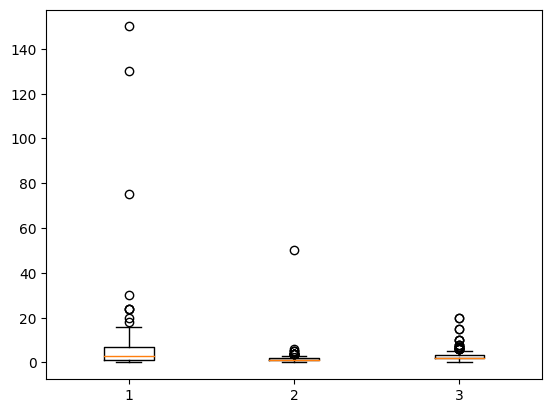

In [208]:
plt.boxplot(microcuanti)

A continuación ajustaré los outliers con ayuda del rango intercuartílico, para que los valores que estén fuera del rango se ajuste al valor máximo en este caso que esté dentro de los parámetros aceptables de acuerdo al método de rango intercuartílico.

In [210]:
q1 = microcuanti['how_many_shelves_does_the_micro_retailer_have'].quantile(0.25)
q3 = microcuanti['how_many_shelves_does_the_micro_retailer_have'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_df = microcuanti[(microcuanti['how_many_shelves_does_the_micro_retailer_have'] >= lower_bound) & (microcuanti['how_many_shelves_does_the_micro_retailer_have'] <= upper_bound)]


In [212]:

microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_have'] > upper_bound, upper_bound, microcuanti['how_many_shelves_does_the_micro_retailer_have'])

microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_have'] < lower_bound, lower_bound, microcuanti['how_many_shelves_does_the_micro_retailer_have'])


<ipython-input-212-bab5b38877ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_have'] > upper_bound, upper_bound, microcuanti['how_many_shelves_does_the_micro_retailer_have'])
<ipython-input-212-bab5b38877ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer

Después haremos lo mismo con las otras dos variables, dado que son números enteros se tienen que ajustar para que queden números enteros y ajustados a los parámetros.

In [216]:
q11 = microcuanti['current_permanent_employees'].quantile(0.25)
q31 = microcuanti['current_permanent_employees'].quantile(0.75)
iqr1 = q31 - q11

lower_bound1 = q11 - 1.5 * iqr1
upper_bound1 = q31 + 1.5 * iqr1
filtered_df1 = microcuanti[(microcuanti['current_permanent_employees'] >= lower_bound1) & (microcuanti['current_permanent_employees'] <= upper_bound1)]


In [217]:
microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] > upper_bound1, upper_bound1, microcuanti['current_permanent_employees'])

microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] < lower_bound1, lower_bound1, microcuanti['current_permanent_employees'])


<ipython-input-217-093928c1972d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] > upper_bound1, upper_bound1, microcuanti['current_permanent_employees'])
<ipython-input-217-093928c1972d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] < lower_bound1, lower_bound1, microcuanti['current_permanent_employees'])


In [218]:
q12 = microcuanti['number_direct_competitors'].quantile(0.25)
q32 = microcuanti['number_direct_competitors'].quantile(0.75)
iqr2 = q32 - q12

lower_bound2 = q12 - 1.5 * iqr2
upper_bound2 = q32 + 1.5 * iqr2
filtered_df2 = microcuanti[(microcuanti['number_direct_competitors'] >= lower_bound2) & (microcuanti['number_direct_competitors'] <= upper_bound2)]

In [219]:
microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] > upper_bound2, upper_bound2, microcuanti['number_direct_competitors'])

microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] < lower_bound2, lower_bound2, microcuanti['number_direct_competitors'])


<ipython-input-219-b3a92be80542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] > upper_bound2, upper_bound2, microcuanti['number_direct_competitors'])
<ipython-input-219-b3a92be80542>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] < lower_bound2, lower_bound2, microcuanti['number_direct_competitors'])


In [ ]:
freq_tbl(micro)